In [1]:
import requests
import json 
import pandas as pd
import numpy as np
import os
import random
import time
from fake_useragent import UserAgent
import socket
 
socket.setdefaulttimeout(10) 


ua = UserAgent()
data = []
count = 0
valid_data = []
try:
      for y in range(2018,2023):
        for m in range(1,13):
          print(y,m)
          url = "https://www.twse.com.tw/rwd/zh/afterTrading/STOCK_DAY?date={:4d}{:02d}01&stockNo=2882&response=json&_=1692358661657".format(y,m)
            #格式化字符函數 str.format()，透過 {} 和 format 來代替 %運算符號
            #  The format specification can be written after : in {}.
          # print(url)
            #formats an integer (d) to a field of minimum width 2 (2), with zero-padding on the left (leading 0)
          
          
          headers = {
            "Content-Type" : "application/json/json;charset=UTF-8",
            "X-Application-Context": "application:production",
            "Accept-Encoding": "gzip, deflate, br", 
            "Accept-Language": "zh-TW,zh;q=0.9", 
            "User-Agent": ua.random
          }
          
          response = requests.get(url,headers=headers,timeout=5)
          js_data = json.loads(response.text)
          # print(js_data)
          stock = js_data["data"]
          fields0 = js_data["fields"]
          print(stock[0])
          # detail = stock[日期(日)][項目]
          N = len(stock)
          for i in range(0,N-1):
              date = stock[i][0]
              trading_volume = stock[i][1] #成交股數 Trading Volume 
              transaction= stock[i][2]
              opening_price= stock[i][3]
              highest_price= stock[i][4]
              lowest_price= stock[i][5]
              closing_price= stock[i][6]
              change= stock[i][7]
              NT= stock[i][8] #成交筆數 (Number of Transactions)
              data.append([date,trading_volume,transaction,opening_price,highest_price,lowest_price,closing_price,change,NT])
          
          # print(type(stock))
        time.sleep(15)


      # print(type(data),type(fields0))
      # print(data)
      # 將資料轉成dataframe export to csv
      # # use Pandas
      year_df = pd.DataFrame(data,columns=fields0)
      print("2018-2022 stock df")
      # 轉成csv檔
      os.makedirs('./2018_2022',exist_ok=True)
      year_df.to_csv("./2018_2022/2018_2022_year_2882_stock.csv",encoding="utf-8-sig")
      p = pd.read_csv('./2018_2022/2018_2022_year_2882_stock.csv')  
      print(p.head())

except:
      print("ERROR")



2018 1
['107/01/02', '15,815,336', '854,169,244', '53.40', '54.40', '53.30', '54.20', '+0.70', '6,568']
2018 2
['107/02/01', '10,666,353', '586,057,716', '54.70', '55.20', '54.60', '54.80', '+0.20', '3,334']
2018 3
['107/03/01', '16,612,906', '895,716,678', '53.50', '54.30', '53.50', '53.90', '-0.60', '7,598']
2018 4
['107/04/02', '5,603,404', '294,066,788', '52.70', '52.70', '52.20', '52.50', ' 0.00', '2,229']
2018 5
['107/05/02', '12,811,907', '684,391,203', '53.20', '53.80', '53.10', '53.50', ' 0.00', '5,355']
2018 6
['107/06/01', '10,980,132', '585,077,509', '53.60', '53.70', '53.10', '53.50', '-0.10', '5,167']
2018 7
['107/07/02', '13,759,919', '734,373,779', '53.40', '53.80', '53.10', '53.20', '-0.60', '4,242']
2018 8
['107/08/01', '8,109,779', '425,667,579', '52.60', '52.80', '52.30', '52.50', '-0.20', '2,982']
2018 9
['107/09/03', '6,788,053', '353,326,356', '52.20', '52.30', '51.90', '52.00', '-0.60', '2,905']
2018 10
['107/10/01', '6,771,536', '358,021,270', '52.90', '53.00',

**爬蟲2882 五年內股票資料**
**匯入csv，建立Dataset**


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates    #處理日期
import warnings 

warnings.filterwarnings("ignore")
data = pd.read_csv('./2018_2022/2018_2022_year_2882_stock.csv')
# print(data.shape)
# print(data.sample(7))

In [3]:
# print(data.info())

In [4]:
date =data['日期']
print(date[:5])

# only can run once
for i in range(0,len(date)):
  date.iloc[i]=date.iloc[i].replace(date.iloc[i][0:3], str(int(date.iloc[i][0:3]) + 1911))

  
print(date.iloc[2][0:3],str(int(date.iloc[0][0:3]) + 1911))
print(date.iloc[2][0:5])
print(date.iloc[0][0:4])
# data.info()
print('-'*20)


date=pd.to_datetime(date,format='%Y/%m/%d' ) 
data['日期'] = pd.to_datetime(data['日期'])
date.head()
print(data.info())

0    107/01/02
1    107/01/03
2    107/01/04
3    107/01/05
4    107/01/08
Name: 日期, dtype: object
201 2112
2018/
2018
--------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1164 entries, 0 to 1163
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Unnamed: 0  1164 non-null   int64         
 1   日期          1164 non-null   datetime64[ns]
 2   成交股數        1164 non-null   object        
 3   成交金額        1164 non-null   object        
 4   開盤價         1164 non-null   float64       
 5   最高價         1164 non-null   float64       
 6   最低價         1164 non-null   float64       
 7   收盤價         1164 non-null   float64       
 8   漲跌價差        1164 non-null   object        
 9   成交筆數        1164 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(4)
memory usage: 91.1+ KB
None


<class 'pandas.core.series.Series'>


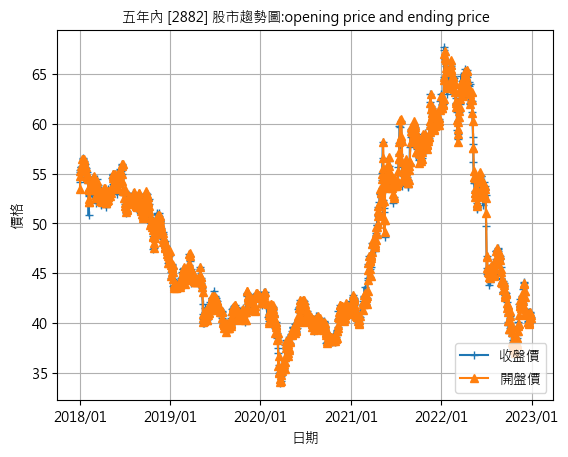

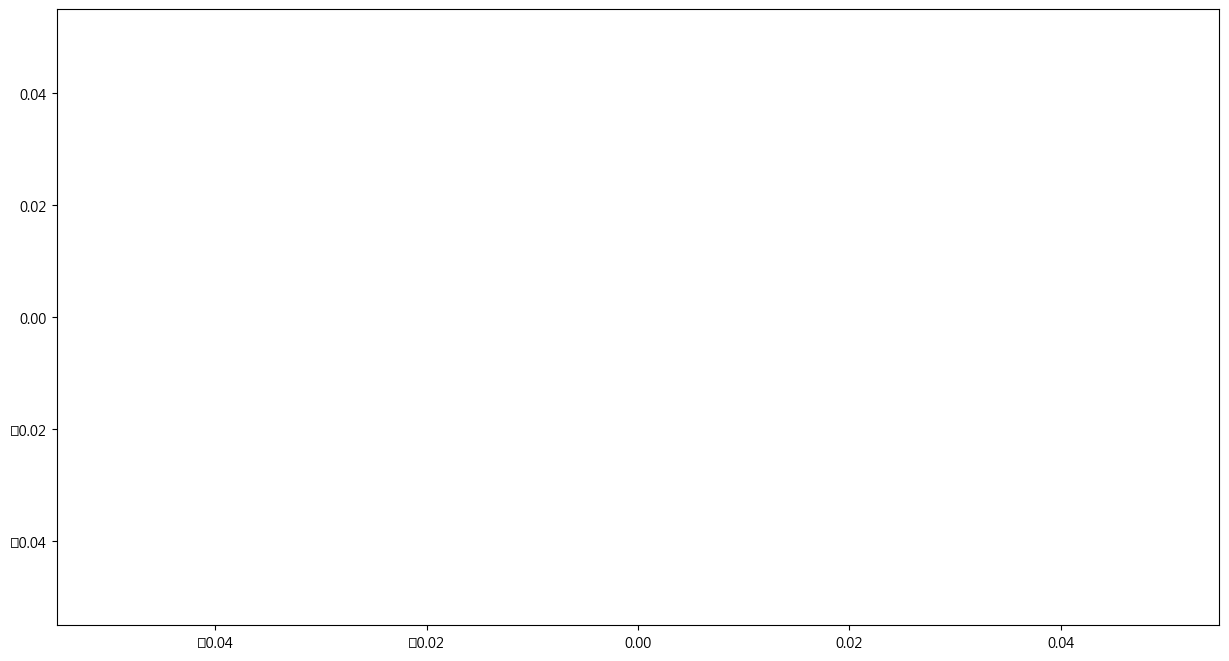

In [9]:
# date vs open
# date vs close

# #趨勢圖需要 日期、價格、開盤價、收盤價
date = data['日期']
opening_price = data['開盤價']
end_price = data['收盤價']

print(type(date))
fig, ax = plt.subplots()

# # 設定中文字體
plt.rcParams['font.sans-serif'] = ["Microsoft JhengHei"]

ax.ticklabel_format(axis="x", useOffset=False)


plt.figure(figsize=(15,8))
ax.plot(date,end_price,label="close",marker="+")
ax.plot(date,opening_price,label="open",marker="^")
ax.set_title("五年內 [2882] 股市趨勢圖:opening price and ending price" ,fontsize='medium')
ax.set_xlabel("日期")
ax.set_ylabel("價格")

#設定x軸主刻度顯示格式（月）
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y/%m"))
#設定x軸主刻度間距
ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=1))
ax.legend(["收盤價","開盤價"],loc="lower right")
# ax.tight_layout()#子圖表會自動保持合適的間距。

ax.grid(True)

plt.plot()
# 存成圖片
plt.savefig("./plot_pic/2882_annual_opening_and_ending_price_matplotlib_chat.png")
# # 顯示圖片
plt.show()

0       15,815,336
1       32,123,721
2       17,321,761
3       22,221,913
4       22,253,987
           ...    
1159    33,981,856
1160     9,586,592
1161     8,308,875
1162    16,443,155
1163    17,280,672
Name: 成交股數, Length: 1164, dtype: object


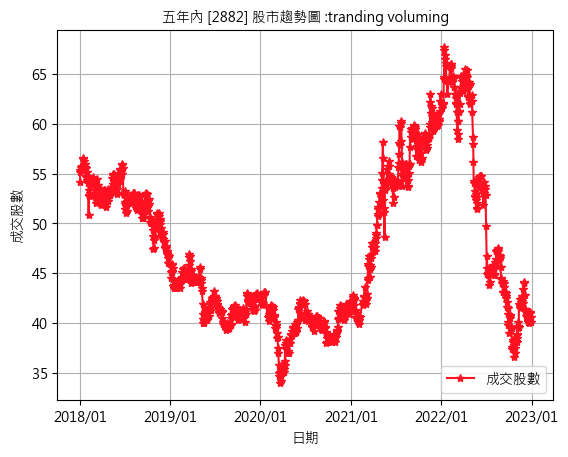

In [7]:
# date vs trading_voluming


# date vs open
# date vs close

# #趨勢圖需要 日期、成交股數
date = data['日期']
trading_volume = data['成交股數']

print(trading_volume)
fig, ax = plt.subplots()

# # 設定中文字體
plt.rcParams['font.sans-serif'] = ["Microsoft JhengHei"]

ax.ticklabel_format(axis="x", useOffset=False)


# plt.figure(figsize=(15,8))
ax.plot(date,end_price,label="close",marker="*",color="#ff1122")
ax.set_title("五年內 [2882] 股市趨勢圖 :tranding voluming" ,fontsize='medium')
ax.set_xlabel("日期")
ax.set_ylabel("成交股數")

#設定x軸主刻度顯示格式（月）
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y/%m"))
#設定x軸主刻度間距
ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=1))
ax.legend(["成交股數"],loc="lower right")
# ax.tight_layout()#子圖表會自動保持合適的間距。

ax.grid(True)

plt.plot()
# 存成圖片
plt.savefig("./plot_pic/2882_annual_trading_volume_matplotlib_chat.png")
# # 顯示圖片
plt.show()

## 實現預測股票Stock Price Prediction Project using TensorFlow

**Importing Libraries and Dataset**
let’s scrape the dataset into the pandas dataframe. 

**install**

**error and solution**